In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ('ignore')

**Step 1: Importing data**

In [4]:
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Step 2: EDA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df = df.rename(columns = {'R&D Spend': 'RnD', 'Administration': 'admin', 'Marketing Spend': 'marketing', 'Profit':'profit'})

In [8]:
df.head()

,RnD,admin,marketing,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df[df.values == 0]

,RnD,admin,marketing,State,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [10]:
(df['RnD'] == 0).sum()

2

In [11]:
(df['marketing'] == 0).sum()

3

In [12]:
df[df.duplicated()].shape

(0, 5)

In [13]:
df[df.duplicated()]

,RnD,admin,marketing,State,profit


**Step 3: Check for outliers**

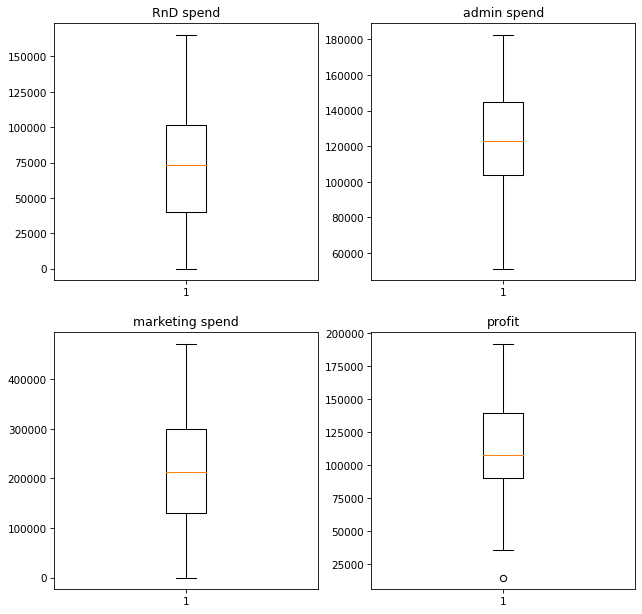

In [14]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 75

plt.subplot(221)
plt.boxplot(df['RnD'])
plt.title('RnD spend')

plt.subplot(222)
plt.boxplot(df['admin'])
plt.title('admin spend')

plt.subplot(223)
plt.boxplot(df['marketing'])
plt.title('marketing spend')

plt.subplot(224)
plt.boxplot(df['profit'])
plt.title('profit')

plt.show()

As we can see, there is outlier in profit

In [15]:
Q1 = np.quantile(df.profit,0.25)
Q3 = np.quantile(df.profit,0.75)
med = np.median(df.profit)
IQR = Q3 - Q1
upper_whisker = Q3+(1.5*IQR)
lower_whisker = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_whisker,'\n' 'Lower Whisker=', lower_whisker)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [16]:
Outliers = df.profit[(df.profit > upper_whisker) | (df.profit < lower_whisker)]
Outliers

49    14681.4
Name: profit, dtype: float64

In [17]:
df[df.index.isin([49])]

,RnD,admin,marketing,State,profit
49,0.0,116983.8,45173.06,California,14681.4


Since this is the only oulier, we can remove this outlier as we dont want it to affect out prediction model.

Before we handle the outlier, lets check how much influence it has on the model and then decide.

**Step 4: Check the Correlation**

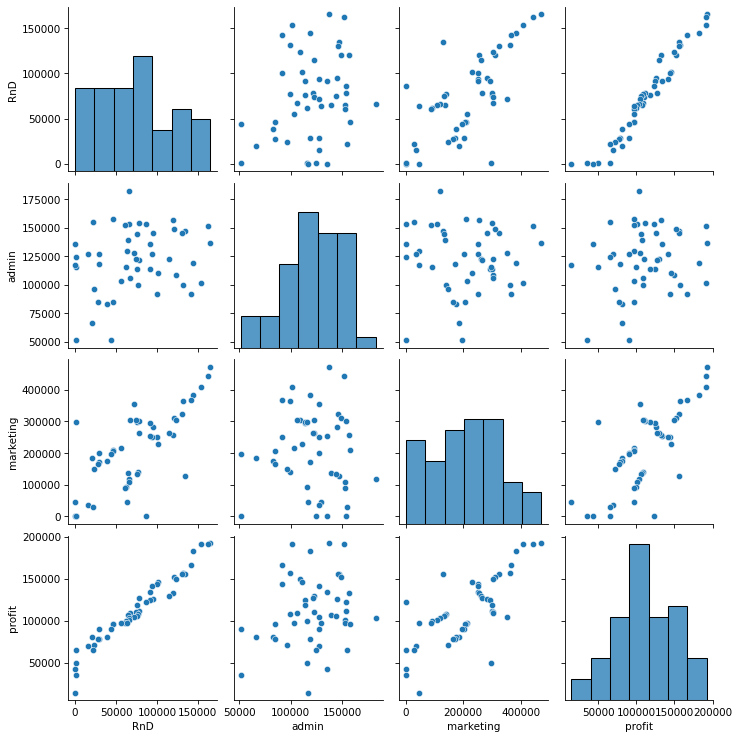

In [18]:
sns.pairplot(df)

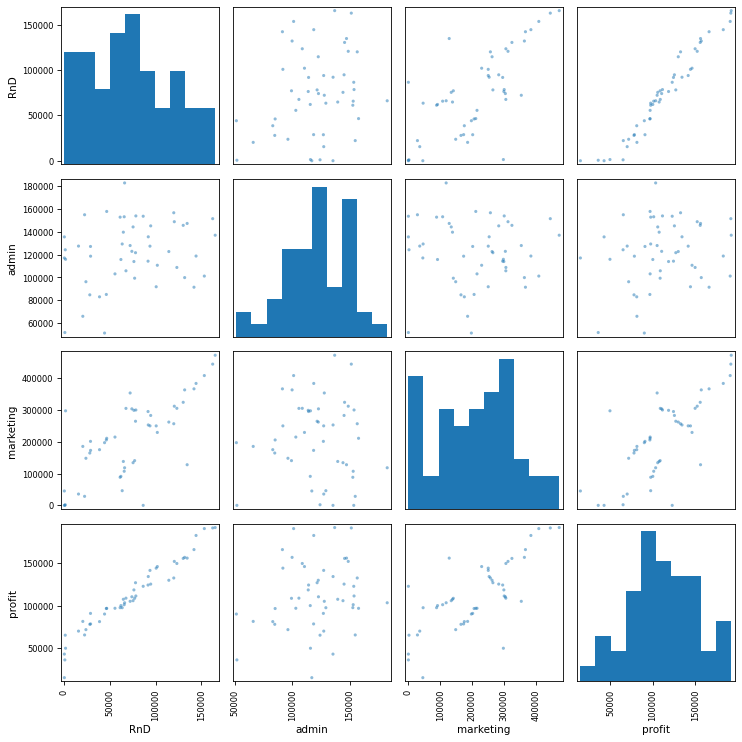

In [19]:
pd.plotting.scatter_matrix(df);
plt.tight_layout()

In [20]:
df.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

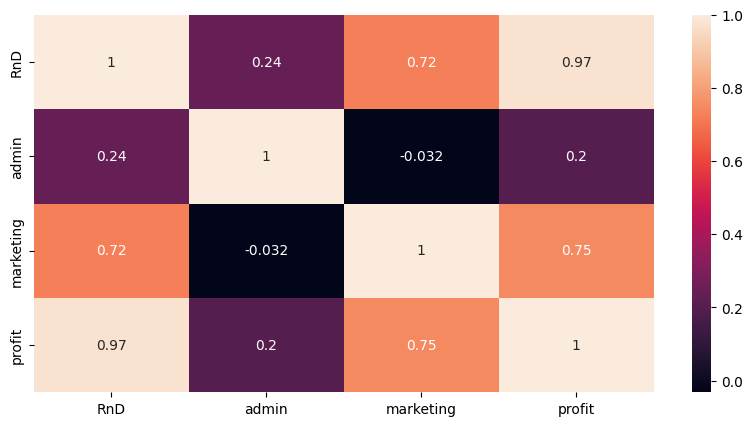

In [21]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100

sns.heatmap(df.corr(), annot = True)

**Step 5: Model Building**

In [22]:
import statsmodels.formula.api as smf

In [23]:
df.columns

Index(['RnD', 'admin', 'marketing', 'State', 'profit'], dtype='object')

In [24]:
model = smf.ols('profit ~ RnD + admin + marketing', data =df).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        20:05:41   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#checking coeffecients m, c

model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [27]:
#tvalue, pvalue

print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RnD          17.846374
admin        -0.525507
marketing     1.655077
dtype: float64 
 Intercept    1.057379e-09
RnD          2.634968e-22
admin        6.017551e-01
marketing    1.047168e-01
dtype: float64


In [28]:
np.round(model.pvalues,6)

Intercept    0.000000
RnD          0.000000
admin        0.601755
marketing    0.104717
dtype: float64

As Y = C + m*(X)\
Here, (Intercept) **p value of C** = 0.00 & \
                  **p value of m** = Rnd(m1) = 0.00, admin(m2) = 0.60, marketing(m3) = 0.10\
Hypothesis testing of X variable by finding test_statistics and P_values for m\
i.e if (P_value < α=0.05 ; Reject Null)\
H0 : p- value of m = 0 (No Slope) \
H1 : p- value of m ≠ 0 (Some or significant Slope)

Asper the p-values we got,

If pvalue < (α=0.05); Reject Null hyp. \
pvalue > (α=0.05); Reject Null hyp
Thus,  

*   X1(Rnd) variable has good slope and variance w.r.t Y(Profit) variable. (viz. Rnd Spend affects Profit)

*   X2(admin) variable does not have good slope and variance w.r.t Y(Profit) variable. (viz. admin does not affects Profit)
*   X3(marketing) variable does not have good slope and variance w.r.t Y(Profit) variable. (viz. marketing does not affects Profit)




In [29]:
# Lets check if there is any multicollinearity issue by conducting simple linear regression with each independant variable
# as per the the plot marketing and Rnd seems to have collinearity between them

**Step 6: Simple Linear Regression**

In [30]:
#Profit~RnD

model_rnd = smf.ols('profit ~ RnD', data = df).fit()
model_rnd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           3.50e-32
Time:                        20:05:41   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Profit~marketing

model_marketing = smf.ols('profit ~ marketing', data = df).fit()
model_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           4.38e-10
Time:                        20:05:41   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, p-value has reduced and has become 0.00 which is less than alpha= 0.05. Thus, marketing also affects the profit.

So, there is multicollinearity problem.

In [32]:
#Profit~admin

model_marketing = smf.ols('profit ~ admin', data = df).fit()
model_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.162
Time:                        20:05:41   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see,

*   Admin spend column p value is greated than alpha and Rsquared value is very less.
*   AIC value is also higher that every other feature (lesser the AIC, better the fit is).
*   So this column might be insignificant for prediction. Lets check the VIF to see if it causes and multicollineary as well and remove it.









**Step 7: Solving Multicollinearity**

**7.1 Calculating VIF**

In [33]:
df.columns

Index(['RnD', 'admin', 'marketing', 'State', 'profit'], dtype='object')

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['RnD', 'marketing', 'admin']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
                  
vif_data

,feature,VIF
0,RnD,8.384571
1,marketing,7.593984
2,admin,4.026406


As we can see,

*   Marketing and Rnd has the highest VIF
*   This implies Rnd and marketing has collinearity inbetween them.
*   We should get rid of one of the these columns since these column have VIF>5, which indicates high multicollinearity
*   Let's try another approach that will justify our first test we conducted











**7.2 Calculating AIC**

In [35]:
model_rnd_marketing = smf.ols('profit ~ RnD + marketing', data = df).fit()
print(model_rnd_marketing.rsquared, model_rnd_marketing.aic)

0.9504503015559763 1057.070772191826


Since these two column has high multicollinearity, lets check them individualy

In [36]:
model_rnd = smf.ols('profit ~ RnD ', data = df).fit()
print(model_rnd.rsquared, model_rnd.aic)

0.9465353160804393 1058.8730295624773


In [37]:
model_marketing = smf.ols('profit ~ marketing', data = df).fit()
print(model_marketing.rsquared, model_marketing.aic)

0.5591535746115515 1164.3567921009328


As we can see,

*   Rsquare value is high and the AIC is lesser in RnD model which implies it is better than marketing model


Lets check them seperately with other feature

In [38]:
model_rnd_admin = smf.ols('profit ~ RnD + admin', data = df).fit()
print(model_rnd_admin.rsquared, model_rnd_admin.aic)

0.9478129385009173 1059.6636934567293


In [39]:
model_marketing_admin = smf.ols('profit ~ marketing + admin', data = df).fit()
print(model_marketing_admin.rsquared, model_marketing_admin.aic)

0.6097229746770664 1160.2648038638672



As we see, RnD+admin model is still better since it has higher Rsqaured Value and lesser AIC.

But,
*   As we already found, R squared value is reducing and AIC is increasing when admin column is used.
*   As the p value is high, we knew that this column has no effect on profit. So lets get rid of admin column



**Lets Visualize the following highest Rsquared models for better understanding and to choose the best model**


1.   profit ~ RnD + marketing

1.   profit ~ RnD + admin
2.   profit ~ Rnd






eval_env: 1


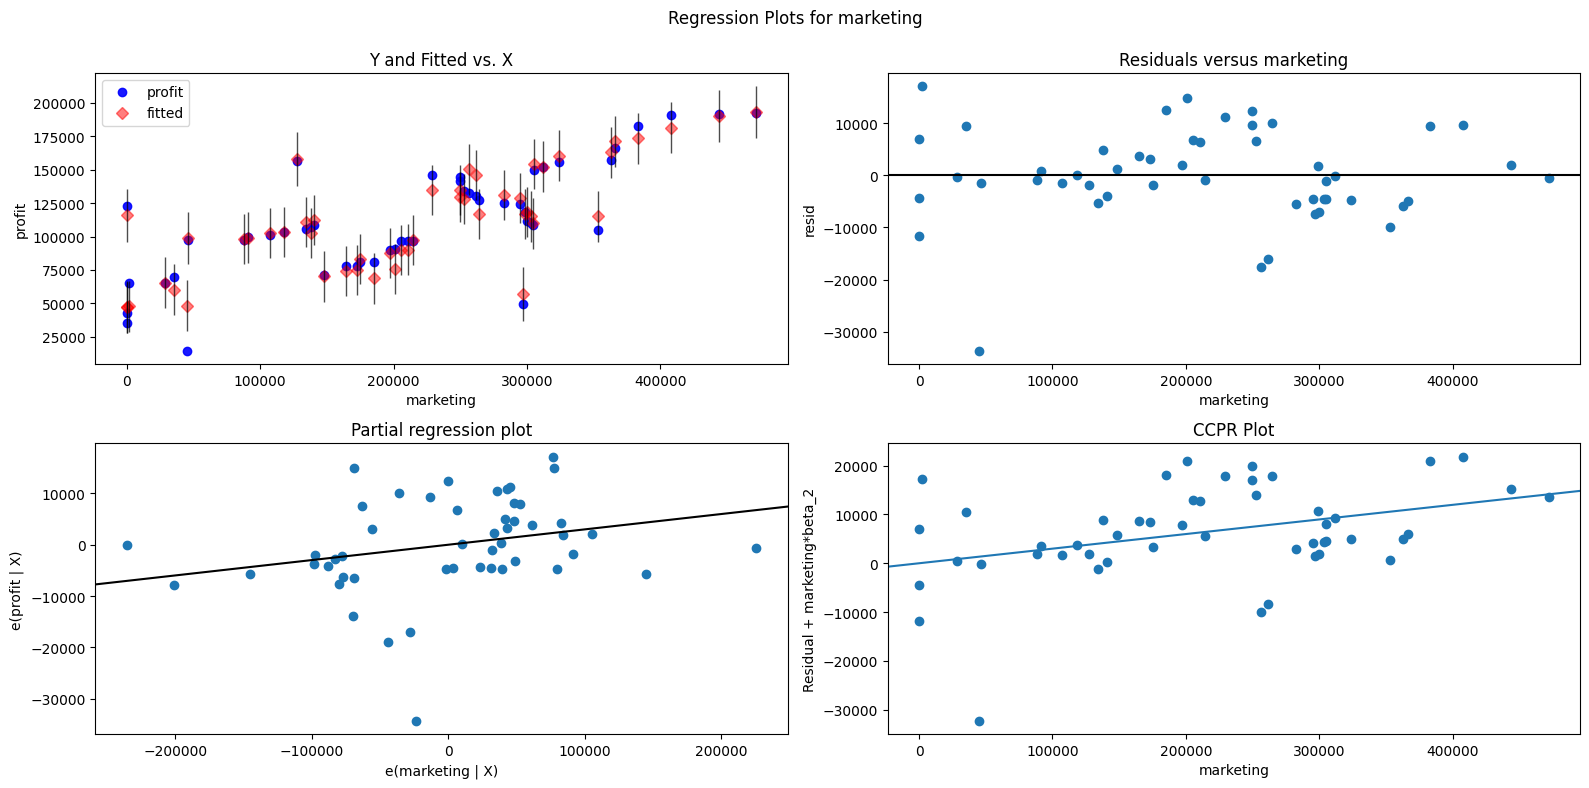

In [40]:
# model_rnd_marketing ==> profit ~ RnD + marketing

fig = plt.figure(figsize = (16,8))
sm.graphics.plot_regress_exog(model_rnd_marketing, 'marketing', fig=fig)
plt.show()

eval_env: 1


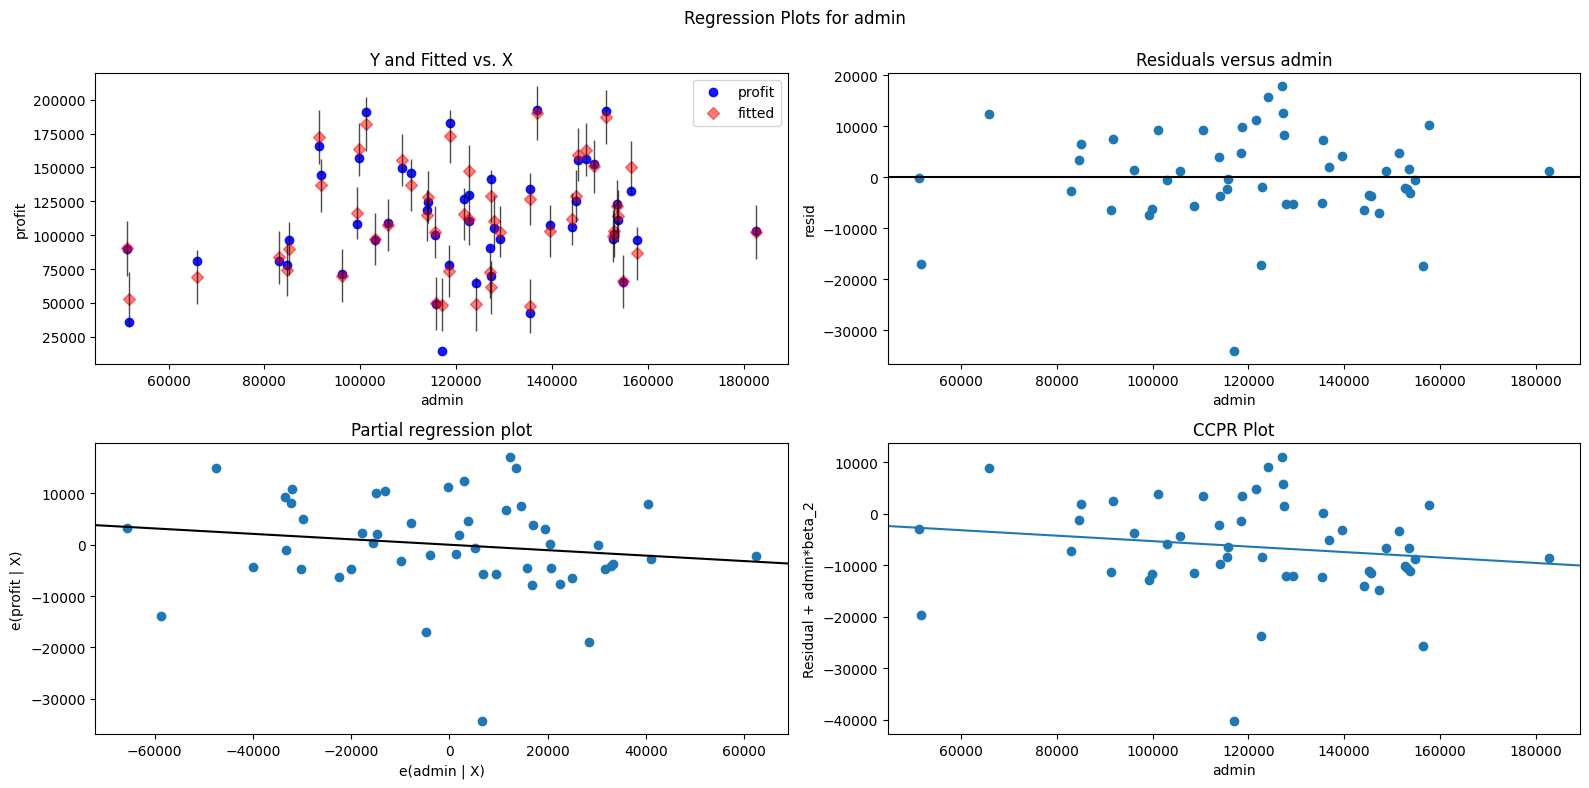

In [41]:
# model_rnd_admin ==> profit ~ RnD + admin

fig = plt.figure(figsize = (16,8))
sm.graphics.plot_regress_exog(model_rnd_admin, 'admin', fig=fig)
plt.show()

eval_env: 1


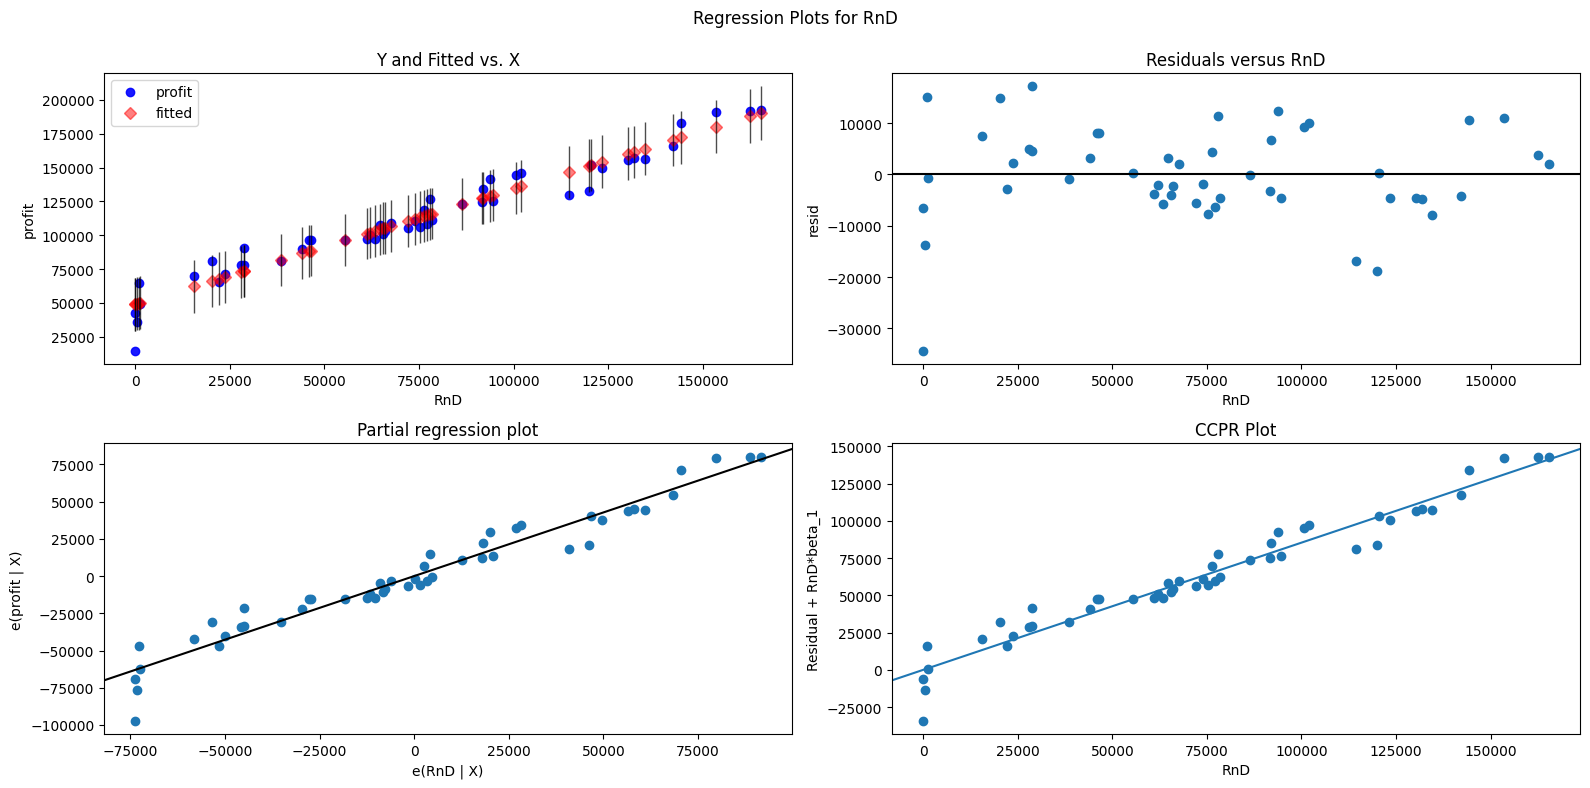

In [42]:
# model_rnd ==> profit ~ RnD 

fig = plt.figure(figsize = (16,8))
sm.graphics.plot_regress_exog(model_rnd, 'RnD', fig=fig)
plt.show()

**Observation: All our Assumptions are satisfied by the above model**


*   Feature should be independent of each other there should'nt be any dependency upon each other it is satisfied by the model using Rnd feature
*   While building a model using RnD we got better results better AIC, BIC, R-squared, R-squared adjusted, p_value(Test of Independence) and F-statistics score by comparing it with the model in which Adminstration feature was used.


*   The Model that was build without using Administration and Marketing feature performed very well. For further We are going to use the model which was build by using only R&D feature



In [43]:
df.drop(columns={'admin', 'marketing'}, inplace= True)

In [44]:
df.head(2)

,RnD,State,profit
0,165349.2,New York,192261.83
1,162597.7,California,191792.06


**Step 8: Final Model**

In [45]:
final_model = smf.ols('profit ~ RnD', data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           3.50e-32
Time:                        20:05:44   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Step 9: Model Validation**

**9.1 Residual Analysis**


*  Test for Normality of Residuals (Q-Q Plot)




In [46]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 100

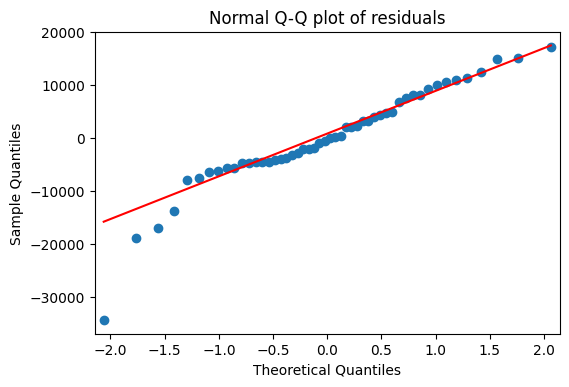

In [47]:
#Residuals values  = y - y_pred

sm.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

As we can see, the data is nearly data normaly distributed. Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

**9.2 Residual Plot to check Homoscedasticity or Hetroscedasticity**

Text(0, 0.5, 'Residual')

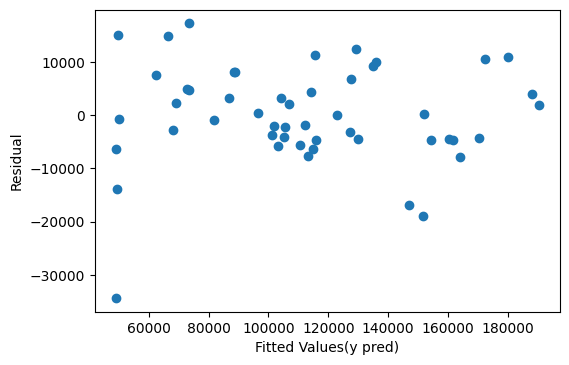

In [48]:
plt.scatter(x = final_model.fittedvalues, y = final_model.resid)
plt.xlabel('Fitted Values(y pred)')
plt.ylabel('Residual')



*   Constant Variance (Homoscedasticity) in Error




**9.3 Residual VS Regressors**



*   Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors



eval_env: 1


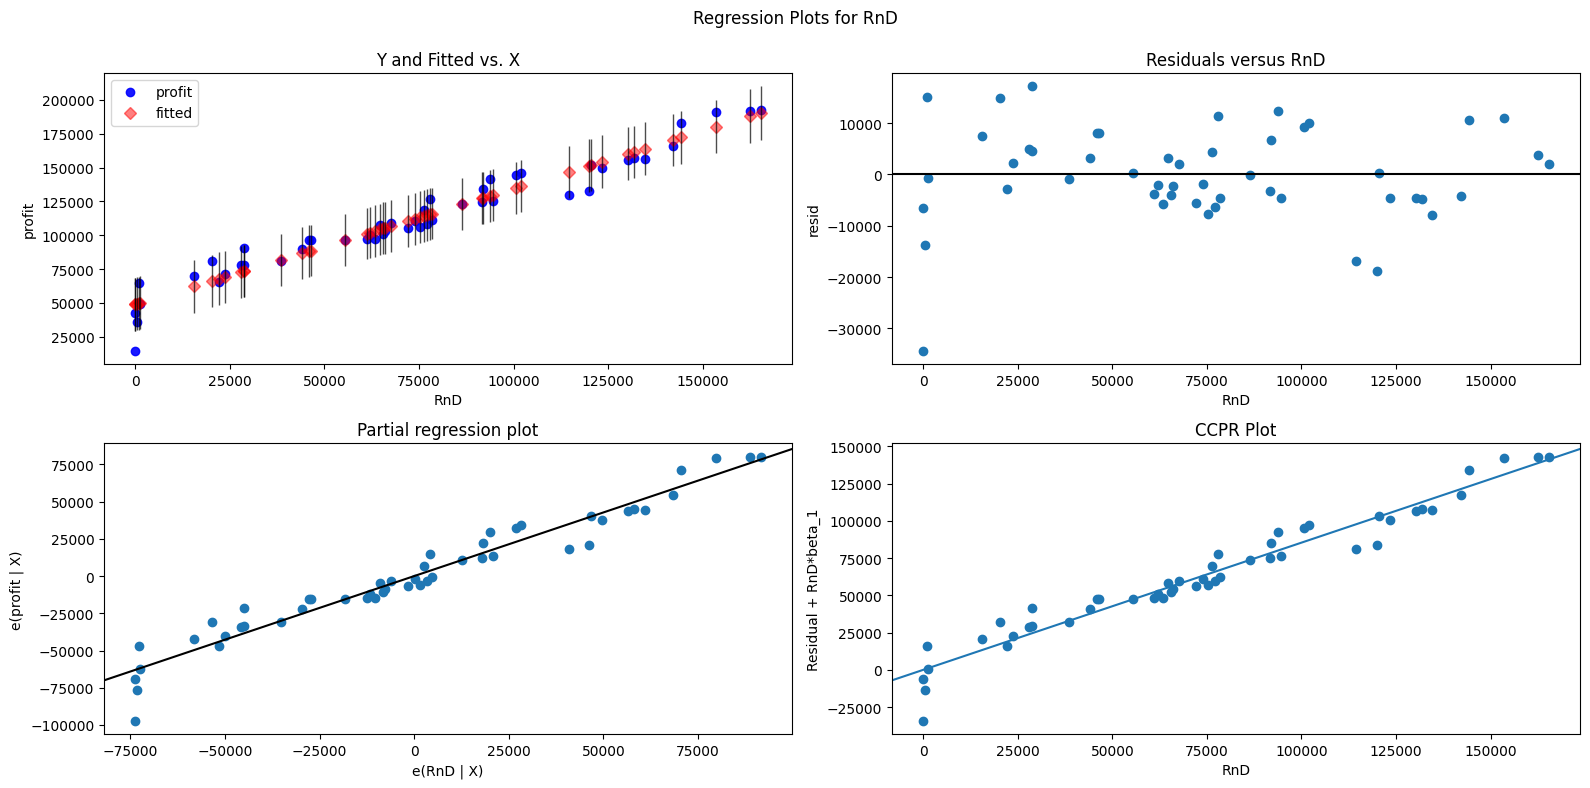

In [49]:
fig = plt.figure(figsize = (16,8))
final_model_plot = sm.graphics.plot_regress_exog(final_model, 'RnD', fig=fig)
plt.show()



*  Each Feature and Model Error (residuals) should be independent of each other

*   There should be a linear relation between the dependent variable and Independent variables


*   All our assumptions are satisfied. Hence, we can say our model is a good model let us test more to make it even better






**9.4 Cook's Distance**



*   For Detecting Influencers/Outliers in the Model






In [50]:
inf_points = final_model.get_influence()
c,p = inf_points.cooks_distance
c

array([2.75252280e-03, 9.89908565e-03, 6.51765486e-02, 4.92628317e-02,
       7.59828403e-03, 7.33387104e-03, 2.21412554e-02, 6.73661506e-03,
       1.01619773e-05, 5.81403631e-03, 1.66061312e-02, 1.36996956e-02,
       2.16575937e-02, 6.13884016e-03, 8.90397517e-02, 6.30133674e-02,
       1.51718150e-02, 2.94329347e-03, 1.35430569e-03, 8.88551585e-07,
       2.17640968e-03, 2.60842890e-03, 4.21074221e-04, 4.82942604e-04,
       4.68512581e-03, 1.19729011e-03, 6.88519548e-03, 3.72111671e-03,
       5.73468418e-04, 2.01430573e-03, 5.31240320e-04, 1.80999487e-03,
       4.12635748e-03, 1.56789281e-05, 1.04277371e-02, 1.08303093e-02,
       7.16494391e-02, 1.81926575e-03, 6.59971284e-02, 1.80059405e-04,
       5.21569633e-03, 6.02155910e-03, 1.40828291e-03, 1.85762695e-02,
       2.18683314e-03, 1.05297577e-01, 2.04992283e-04, 1.99584124e-02,
       8.98899423e-02, 5.62061026e-01])

<StemContainer object of 3 artists>

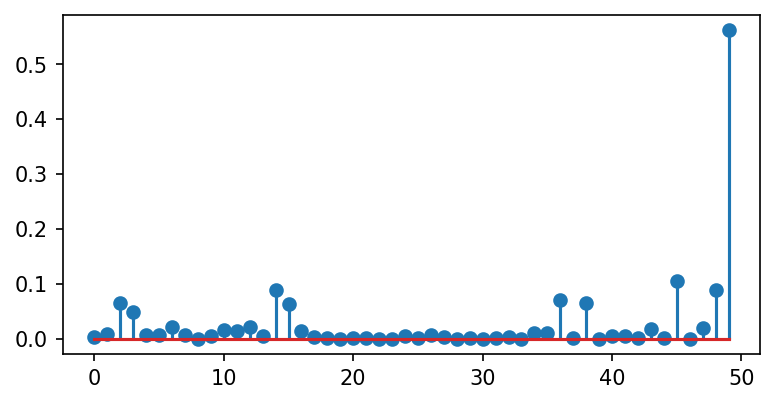

In [51]:
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['figure.dpi'] = 150

# Cook's distance plot

plt.stem(range(len(df)),c)

In [52]:
np.argmax(c),np.max(c)

(49, 0.5620610259264286)

As we saw earlier, this is the extreme outlier we found earlier, lets check the influence befor removing

**9.5 Influence Plot**


*   Finding Leverage Value using High Influence Points
*   Points beyond Leverage_cutoff value are influencers




In [53]:
k = len(df.columns)
n = len(df)

cut_off = 3*(k+1)/n
cut_off

print( 'Cut off is at', cut_off)

Leverage Cut off is at 0.24


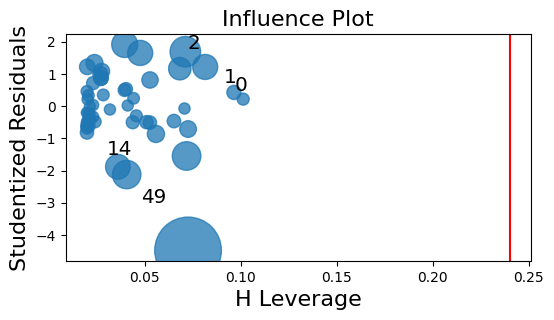

In [54]:
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['figure.dpi'] = 100

from statsmodels.graphics.regressionplots import influence_plot

influence_plot(final_model);
plt.axvline(leverage_cut_off,color = 'r')

Influence is high and leverage is high due to outlier in 49 th row, also doesn't contain and important data point in ather columns. So, lets remove this row now.

In [55]:
df.iloc[[49]]

,RnD,State,profit
49,0.0,California,14681.4


In [56]:
df.drop(index = [49], inplace = True)

In [57]:
final_model2 = smf.ols('profit ~ RnD', data=df).fit()
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           7.56e-34
Time:                        20:05:47   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RnD            0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, Rsquared value has increased, aic value has reduced so the accuracy of the model has increased now. It's a good fit model.

As we can see, model accuracy has increased now

<StemContainer object of 3 artists>

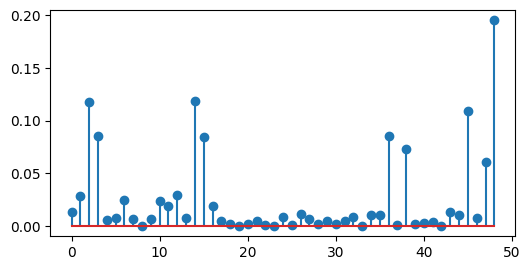

In [58]:
inf_points = final_model2.get_influence()
c2,p2 = inf_points.cooks_distance
plt.stem(range(len(df)),c2)

In [59]:
np.argmax(c2),np.max(c2)

(48, 0.19525888916997844)

Influence value is very less, so we can neglect.

**Step 10 : Trying Model Transformations**


*   To see if the model accuracy increases



In [60]:
sqrt_model = smf.ols('np.sqrt(profit) ~ np.sqrt(RnD)', data=df).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(profit)   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     674.3
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.61e-29
Time:                        20:05:47   Log-Likelihood:                -201.22
No. Observations:                  49   AIC:                             406.4
Df Residuals:                      47   BIC:                             410.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      189.6014      5.913     32.068      0.000     177.707     201.496
np.sqrt(RnD)     0.5598      0.022     25.968      0.000       0.516       0.603
==============================================================================
Omnibus:                        7.169   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.244
Skew:                           0.838   Prob(JB):                       0.0441
Kurtosis:                       3.498   Cond. No.                         757.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fit of the model has become better i.e AIC value has become very less but the Rsquared value has become less.

In [61]:
log_model = smf.ols('np.log(profit) ~ np.log(RnD)', data=df).fit()
log_model.summary()

LinAlgError: ignored

In [62]:
cbrt_model = smf.ols('np.cbrt(profit) ~ np.cbrt(RnD)', data=df).fit()
cbrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(profit)   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     408.4
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           8.08e-25
Time:                        20:10:02   Log-Likelihood:                -98.491
No. Observations:                  49   AIC:                             201.0
Df Residuals:                      47   BIC:                             204.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.6671      0.890     34.460      0.000      28.877      32.457
np.cbrt(RnD)     0.4380      0.022     20.210      0.000       0.394       0.482
==============================================================================
Omnibus:                        7.205   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                6.719
Skew:                           0.902   Prob(JB):                       0.0347
Kurtosis:                       3.191   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here also, AIC value has become very less but the Rsquared value has become less.

**Step 11: Prediction Values using the model**

In [63]:
y_pred = (final_model2.predict(df))
y_pred

0     188606.573993
1     186328.768947
2     178748.897683
3     171241.123108
4     169366.004854
5     160896.825187
6     163163.917967
7     159589.854344
8     151513.758511
9     153825.389148
10    136091.540653
11    135064.090390
12    129427.973693
13    127878.784795
14    151017.649840
15    146531.056868
16    116306.160945
17    130084.791175
18    127677.428982
19    123265.482450
20    114849.781324
21    116617.727257
22    112979.439714
23    107629.905081
24    115503.900044
25    105255.805548
26    114084.036498
27    111417.336494
28    106403.863994
29    106034.613708
30    103045.279155
31    102334.908627
32    104216.161184
33     97663.872637
34     90157.108028
35     89815.996064
36     75452.736105
37     88206.614834
38     68470.582739
39     83644.017762
40     75527.713682
41     74814.602999
42     71294.630519
43     64559.976835
44     70083.341562
45     52551.726392
46     52812.686772
47     51723.694794
48     52172.426114
dtype: float64

In [64]:
pd.DataFrame({
              'RnD': df['RnD'],
              'Profit': df['profit'], 
              'Predicted Profit' : y_pred
              })

,RnD,Profit,Predicted Profit
0,165349.20,192261.83,188606.573993
1,162597.70,191792.06,186328.768947
2,153441.51,191050.39,178748.897683
3,144372.41,182901.99,171241.123108
4,142107.34,166187.94,169366.004854
5,131876.90,156991.12,160896.825187
6,134615.46,156122.51,163163.917967
7,130298.13,155752.60,159589.854344
8,120542.52,152211.77,151513.758511
9,123334.88,149759.96,153825.389148
